# EDA Spotify

### 1. Business case & Data Collection

# Hip√≥tesis principales

1. Las canciones con mayor n√∫mero de streams en ambos pa√≠ses comparten caracter√≠sticas musicales similares, como g√©nero, artista o tendencia de crecimiento.
- ¬øC√≥mo lo validamos?
    * Analizar las canciones que aparecen en ambos rankings (M√©xico y Espa√±a).
    * Comparar g√©neros y artistas m√°s frecuentes en los √©xitos compartidos.
    * Evaluar el crecimiento en streams en el tiempo.

2. Las canciones en espa√±ol tienen mayor probabilidad de ser √©xitos en M√©xico y Espa√±a que las canciones en ingl√©s u otros idiomas.
- ¬øC√≥mo lo validamos?
    * Analizar el porcentaje de canciones en espa√±ol dentro del Top 10 de cada pa√≠s.
    * Comparar la cantidad de streams entre canciones en espa√±ol y otros idiomas.

3. Los artistas internacionales (Bad Bunny, Karol G, Taylor Swift, etc.) dominan ambos rankings, m√°s que los artistas locales de cada pa√≠s.
- ¬øC√≥mo lo validamos?
    * Identificar qu√© porcentaje de los artistas en el ranking son de cada pa√≠s.
    * Comparar el n√∫mero de streams entre artistas globales y artistas locales.

4. Las canciones con mayor "longevidad" en los rankings de M√©xico y Espa√±a tienen un crecimiento de streams m√°s estable que aquellas que solo son √©xitos moment√°neos.
- ¬øC√≥mo lo validamos?
    * Analizar la cantidad de semanas que una canci√≥n permanece en el ranking.
    * Comparar el crecimiento en streams entre canciones que duran m√°s tiempo en el ranking vs. las que suben y bajan r√°pidamente.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_charts = pd.read_csv("data/spotify.csv")
df_charts

title  rank        date  \
0               Chantaje (feat. Maluma)     1  2017-01-01   
1           Vente Pa' Ca (feat. Maluma)     2  2017-01-01   
2            Reggaet√≥n Lento (Bailemos)     3  2017-01-01   
3                                Safari     4  2017-01-01   
4                           Shaky Shaky     5  2017-01-01   
...                                 ...   ...         ...   
26173509                            BYE    46  2021-07-31   
26173510                        Pillars    47  2021-07-31   
26173511                   G√°i ƒê·ªôc Th√¢n    48  2021-07-31   
26173512  Renegade (feat. Taylor Swift)    49  2021-07-31   
26173513                Letter to Jarad    50  2021-07-31   

                                         artist  \
0                                       Shakira   
1                                  Ricky Martin   
2                                          CNCO   
3         J Balvin, Pharrell Williams, BIA, Sky   
4                                  Daddy Yankee   
...                                         ...   
26173509                                  Jaden   
26173510                                 My Anh   
26173511                                  Tlinh   
26173512                        Big Red Machine   
26173513              LRN Slime, Shiloh Dynasty   

                                                        url     region  \
0         https://open.spotify.com/track/6mICuAdrwEjh6Y6...  Argentina   
1         https://open.spotify.com/track/7DM4BPaS7uofFul...  Argentina   
2         https://open.spotify.com/track/3AEZUABDXNtecAO...  Argentina   
3         https://open.spotify.com/track/6rQSrBHf7HlZjtc...  Argentina   
4         https://open.spotify.com/track/58IL315gMSTD37D...  Argentina   
...                                                     ...        ...   
26173509  https://open.spotify.com/track/3OUyyDN7EZrL7i0...    Vietnam   
26173510  https://open.spotify.com/track/6eky30oFiQbHUAT...    Vietnam   
26173511  https://open.spotify.com/track/2klsSb2iTfgDh95...    Vietnam   
26173512  https://open.spotify.com/track/1aU1wpYBSpP0M6I...    Vietnam   
26173513  https://open.spotify.com/track/508QhA2SncMbh5C...    Vietnam   

            chart          trend   streams  
0          top200  SAME_POSITION  253019.0  
1          top200        MOVE_UP  223988.0  
2          top200      MOVE_DOWN  210943.0  
3          top200  SAME_POSITION  173865.0  
4          top200        MOVE_UP  153956.0  
...           ...            ...       ...  
26173509  viral50        MOVE_UP       NaN  
26173510  viral50      NEW_ENTRY       NaN  
26173511  viral50      MOVE_DOWN       NaN  
26173512  viral50      MOVE_DOWN       NaN  
26173513  viral50      MOVE_DOWN       NaN  

[26173514 rows x 9 columns]

In [3]:
# Ver las primeras filas del dataset
df_charts.head()

title  rank        date  \
0      Chantaje (feat. Maluma)     1  2017-01-01   
1  Vente Pa' Ca (feat. Maluma)     2  2017-01-01   
2   Reggaet√≥n Lento (Bailemos)     3  2017-01-01   
3                       Safari     4  2017-01-01   
4                  Shaky Shaky     5  2017-01-01   

                                  artist  \
0                                Shakira   
1                           Ricky Martin   
2                                   CNCO   
3  J Balvin, Pharrell Williams, BIA, Sky   
4                           Daddy Yankee   

                                                 url     region   chart  \
0  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  Argentina  top200   
1  https://open.spotify.com/track/7DM4BPaS7uofFul...  Argentina  top200   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  Argentina  top200   
3  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  Argentina  top200   
4  https://open.spotify.com/track/58IL315gMSTD37D...  Argentina  top200   

           trend   streams  
0  SAME_POSITION  253019.0  
1        MOVE_UP  223988.0  
2      MOVE_DOWN  210943.0  
3  SAME_POSITION  173865.0  
4        MOVE_UP  153956.0

In [4]:
# Resumen estad√≠stico de las columnas num√©ricas
df_charts.describe()


rank       streams
count  2.617351e+07  2.032190e+07
mean   8.092314e+01  5.526131e+04
std    5.918601e+01  2.095872e+05
min    1.000000e+00  1.001000e+03
25%    2.900000e+01  3.546000e+03
50%    6.700000e+01  9.565000e+03
75%    1.310000e+02  3.540900e+04
max    2.000000e+02  1.974970e+07

In [5]:
# Comprobar si hay valores nulos en el dataset
df_charts.isnull().sum()

title           11
rank             0
date             0
artist          18
url              0
region           0
chart            0
trend            0
streams    5851610
dtype: int64

In [6]:
# Ver los tipos de datos en cada columna
df_charts.dtypes

title       object
rank         int64
date        object
artist      object
url         object
region      object
chart       object
trend       object
streams    float64
dtype: object

In [7]:
# Eliminamos la columna URL que no necesitamos

df_charts = df_charts.drop(columns=['url'])

In [8]:
# Filtramos la columna Region para usar solo los datos de M√©xico y Espa√±a

df_charts = df_charts[df_charts['region'].isin(['Mexico', 'Spain'])]

In [9]:
df_charts

title  rank        date  \
4984            Chantaje (feat. Maluma)     1  2017-01-01   
4985         Reggaet√≥n Lento (Bailemos)     2  2017-01-01   
4986        Vente Pa' Ca (feat. Maluma)     3  2017-01-01   
4987                             Safari     4  2017-01-01   
4988          Otra vez (feat. J Balvin)     5  2017-01-01   
...                                 ...   ...         ...   
26172962  Renegade (feat. Taylor Swift)    46  2021-07-31   
26172963          comoquieroquemequiera    47  2021-07-31   
26172964               Mil y Una Noches    48  2021-07-31   
26172965                  Qu√© M√°s Pues?    49  2021-07-31   
26172966           Levantando las Manos    50  2021-07-31   

                                         artist  region    chart  \
4984                                    Shakira  Mexico   top200   
4985                                       CNCO  Mexico   top200   
4986                               Ricky Martin  Mexico   top200   
4987      J Balvin, Pharrell Williams, BIA, Sky  Mexico   top200   
4988                              Zion & Lennox  Mexico   top200   
...                                         ...     ...      ...   
26172962                        Big Red Machine   Spain  viral50   
26172963                                 LANE 3   Spain  viral50   
26172964                   Guitarricadelafuente   Spain  viral50   
26172965                J Balvin, Maria Becerra   Spain  viral50   
26172966                            Dos Morenos   Spain  viral50   

                  trend   streams  
4984      SAME_POSITION  395069.0  
4985      SAME_POSITION  336760.0  
4986      SAME_POSITION  300392.0  
4987      SAME_POSITION  283184.0  
4988      SAME_POSITION  254484.0  
...                 ...       ...  
26172962      MOVE_DOWN       NaN  
26172963      MOVE_DOWN       NaN  
26172964      MOVE_DOWN       NaN  
26172965      NEW_ENTRY       NaN  
26172966      NEW_ENTRY       NaN  

[898091 rows x 8 columns]

In [10]:
# Revisar si hay duplicados
df_charts.duplicated().sum()

np.int64(0)

In [11]:
# Convertimos date a tipo fecha

df_charts['date'] = pd.to_datetime(df_charts['date'])

In [12]:
# Eliminar filas donde title o artist est√©n vac√≠os

df_charts.dropna(subset=['title', 'artist'], inplace=True)

In [13]:
# Manejar los valores nulos en streams

# Usar la mediana si queremos estimar valores que no tenemos

df_charts['streams'] = df_charts['streams'].fillna(df_charts['streams'].median())

In [14]:
df_charts.isnull().sum()

title      0
rank       0
date       0
artist     0
region     0
chart      0
trend      0
streams    0
dtype: int64

In [15]:
df_charts

title  rank       date  \
4984            Chantaje (feat. Maluma)     1 2017-01-01   
4985         Reggaet√≥n Lento (Bailemos)     2 2017-01-01   
4986        Vente Pa' Ca (feat. Maluma)     3 2017-01-01   
4987                             Safari     4 2017-01-01   
4988          Otra vez (feat. J Balvin)     5 2017-01-01   
...                                 ...   ...        ...   
26172962  Renegade (feat. Taylor Swift)    46 2021-07-31   
26172963          comoquieroquemequiera    47 2021-07-31   
26172964               Mil y Una Noches    48 2021-07-31   
26172965                  Qu√© M√°s Pues?    49 2021-07-31   
26172966           Levantando las Manos    50 2021-07-31   

                                         artist  region    chart  \
4984                                    Shakira  Mexico   top200   
4985                                       CNCO  Mexico   top200   
4986                               Ricky Martin  Mexico   top200   
4987      J Balvin, Pharrell Williams, BIA, Sky  Mexico   top200   
4988                              Zion & Lennox  Mexico   top200   
...                                         ...     ...      ...   
26172962                        Big Red Machine   Spain  viral50   
26172963                                 LANE 3   Spain  viral50   
26172964                   Guitarricadelafuente   Spain  viral50   
26172965                J Balvin, Maria Becerra   Spain  viral50   
26172966                            Dos Morenos   Spain  viral50   

                  trend   streams  
4984      SAME_POSITION  395069.0  
4985      SAME_POSITION  336760.0  
4986      SAME_POSITION  300392.0  
4987      SAME_POSITION  283184.0  
4988      SAME_POSITION  254484.0  
...                 ...       ...  
26172962      MOVE_DOWN   74325.5  
26172963      MOVE_DOWN   74325.5  
26172964      MOVE_DOWN   74325.5  
26172965      NEW_ENTRY   74325.5  
26172966      NEW_ENTRY   74325.5  

[898091 rows x 8 columns]

### 2. Data Understanding

In [16]:
 # Cantidad de filas y columnas

df_charts.shape

(898091, 8)

In [17]:
# Tipos de datos y valores √∫nicos

df_charts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 898091 entries, 4984 to 26172966
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    898091 non-null  object        
 1   rank     898091 non-null  int64         
 2   date     898091 non-null  datetime64[ns]
 3   artist   898091 non-null  object        
 4   region   898091 non-null  object        
 5   chart    898091 non-null  object        
 6   trend    898091 non-null  object        
 7   streams  898091 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 61.7+ MB


In [18]:
# Primeras y √∫ltimas filas del dataset

df_charts.head()
df_charts.tail()

title  rank       date  \
26172962  Renegade (feat. Taylor Swift)    46 2021-07-31   
26172963          comoquieroquemequiera    47 2021-07-31   
26172964               Mil y Una Noches    48 2021-07-31   
26172965                  Qu√© M√°s Pues?    49 2021-07-31   
26172966           Levantando las Manos    50 2021-07-31   

                           artist region    chart      trend  streams  
26172962          Big Red Machine  Spain  viral50  MOVE_DOWN  74325.5  
26172963                   LANE 3  Spain  viral50  MOVE_DOWN  74325.5  
26172964     Guitarricadelafuente  Spain  viral50  MOVE_DOWN  74325.5  
26172965  J Balvin, Maria Becerra  Spain  viral50  NEW_ENTRY  74325.5  
26172966              Dos Morenos  Spain  viral50  NEW_ENTRY  74325.5

In [19]:
# Estad√≠sticas descriptivas

df_charts.describe()

rank                           date       streams
count  898091.000000                         898091  8.980910e+05
mean       85.355424  2019-06-21 03:53:09.128494848  9.591482e+04
min         1.000000            2017-01-01 00:00:00  9.802000e+03
25%        32.000000            2018-03-28 00:00:00  4.982300e+04
50%        75.000000            2019-06-21 00:00:00  7.432550e+04
75%       138.000000            2020-09-13 00:00:00  1.067400e+05
max       200.000000            2021-12-31 00:00:00  3.680758e+06
std        60.070261                            NaN  8.514740e+04

In [20]:
# Proporci√≥n de valores nulos

df_charts.isnull().sum() / len(df_charts) * 100

title      0.0
rank       0.0
date       0.0
artist     0.0
region     0.0
chart      0.0
trend      0.0
streams    0.0
dtype: float64

### 3. Data Cleaning

In [21]:
# En este caso, como solo tenemos un dataset (df_charts), no es necesario hacer merge o join por ahora. Si en el futuro queremos a√±adir m√°s datos, podr√≠amos unirlos con pd.merge().

# Se elimin√≥ anteriormente la columna de URL

# Ya se eliminaron los nulos

In [22]:
# Formatear los Datos
# Aseguramos que los tipos de datos sean correctos:

df_charts['date'] = pd.to_datetime(df_charts['date'])  # Convertir a fecha
df_charts['region'] = df_charts['region'].astype('category')  # Convertir a categor√≠a
df_charts['streams'] = df_charts['streams'].astype(float)  # Asegurar tipo num√©rico

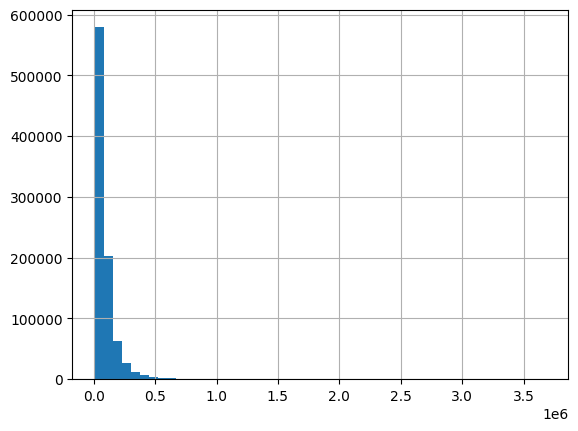

In [23]:
# Identificaci√≥n de Outliers
# Para detectar valores extremos en streams, podemos usar:

import matplotlib.pyplot as plt  
df_charts['streams'].hist(bins=50)  
plt.show()

<Axes: xlabel='streams'>

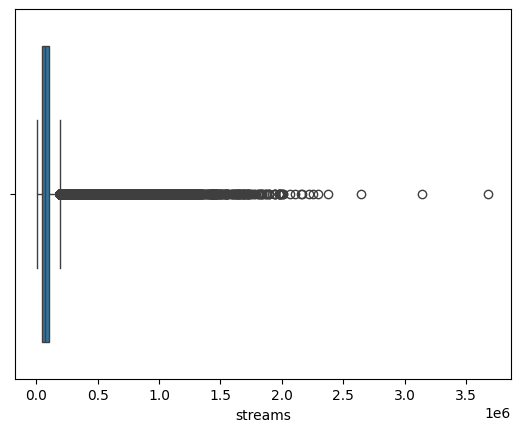

In [24]:
# Diagramas de Caja (Boxplots)

import seaborn as sns  
sns.boxplot(x=df_charts['streams'])

<Axes: xlabel='rank', ylabel='streams'>

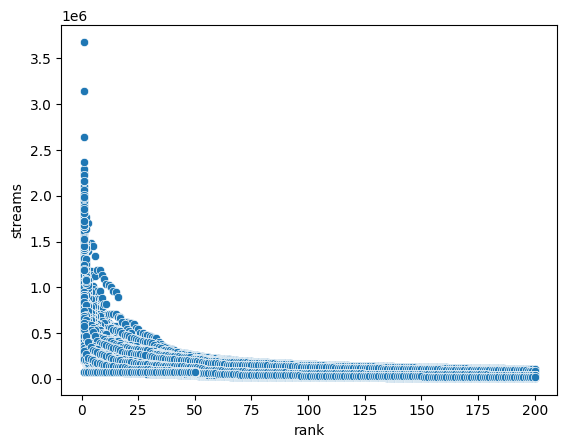

In [25]:
# Scatter Plot

sns.scatterplot(x=df_charts['rank'], y=df_charts['streams'])

In [26]:
# C√°lculo de Cuartiles y Rango Intercuart√≠lico (IQR)

Q1 = df_charts['streams'].quantile(0.25)
Q3 = df_charts['streams'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_charts[(df_charts['streams'] < lower_bound) | (df_charts['streams'] > upper_bound)]
print(f"Se encontraron {len(outliers)} outliers.")

Se encontraron 79069 outliers.


In [27]:
df_charts['year'] = df_charts['date'].dt.year
df_charts['month'] = df_charts['date'].dt.month
df_charts['day'] = df_charts['date'].dt.day
df_charts['day_of_week'] = df_charts['date'].dt.day_name()

In [28]:
df_charts

title  rank       date  \
4984            Chantaje (feat. Maluma)     1 2017-01-01   
4985         Reggaet√≥n Lento (Bailemos)     2 2017-01-01   
4986        Vente Pa' Ca (feat. Maluma)     3 2017-01-01   
4987                             Safari     4 2017-01-01   
4988          Otra vez (feat. J Balvin)     5 2017-01-01   
...                                 ...   ...        ...   
26172962  Renegade (feat. Taylor Swift)    46 2021-07-31   
26172963          comoquieroquemequiera    47 2021-07-31   
26172964               Mil y Una Noches    48 2021-07-31   
26172965                  Qu√© M√°s Pues?    49 2021-07-31   
26172966           Levantando las Manos    50 2021-07-31   

                                         artist  region    chart  \
4984                                    Shakira  Mexico   top200   
4985                                       CNCO  Mexico   top200   
4986                               Ricky Martin  Mexico   top200   
4987      J Balvin, Pharrell Williams, BIA, Sky  Mexico   top200   
4988                              Zion & Lennox  Mexico   top200   
...                                         ...     ...      ...   
26172962                        Big Red Machine   Spain  viral50   
26172963                                 LANE 3   Spain  viral50   
26172964                   Guitarricadelafuente   Spain  viral50   
26172965                J Balvin, Maria Becerra   Spain  viral50   
26172966                            Dos Morenos   Spain  viral50   

                  trend   streams  year  month  day day_of_week  
4984      SAME_POSITION  395069.0  2017      1    1      Sunday  
4985      SAME_POSITION  336760.0  2017      1    1      Sunday  
4986      SAME_POSITION  300392.0  2017      1    1      Sunday  
4987      SAME_POSITION  283184.0  2017      1    1      Sunday  
4988      SAME_POSITION  254484.0  2017      1    1      Sunday  
...                 ...       ...   ...    ...  ...         ...  
26172962      MOVE_DOWN   74325.5  2021      7   31    Saturday  
26172963      MOVE_DOWN   74325.5  2021      7   31    Saturday  
26172964      MOVE_DOWN   74325.5  2021      7   31    Saturday  
26172965      NEW_ENTRY   74325.5  2021      7   31    Saturday  
26172966      NEW_ENTRY   74325.5  2021      7   31    Saturday  

[898091 rows x 12 columns]

### 4. Analysis

In [29]:
# Estad√≠sticos descriptivos de streams
df_charts['streams'].describe()


count    8.980910e+05
mean     9.591482e+04
std      8.514740e+04
min      9.802000e+03
25%      4.982300e+04
50%      7.432550e+04
75%      1.067400e+05
max      3.680758e+06
Name: streams, dtype: float64

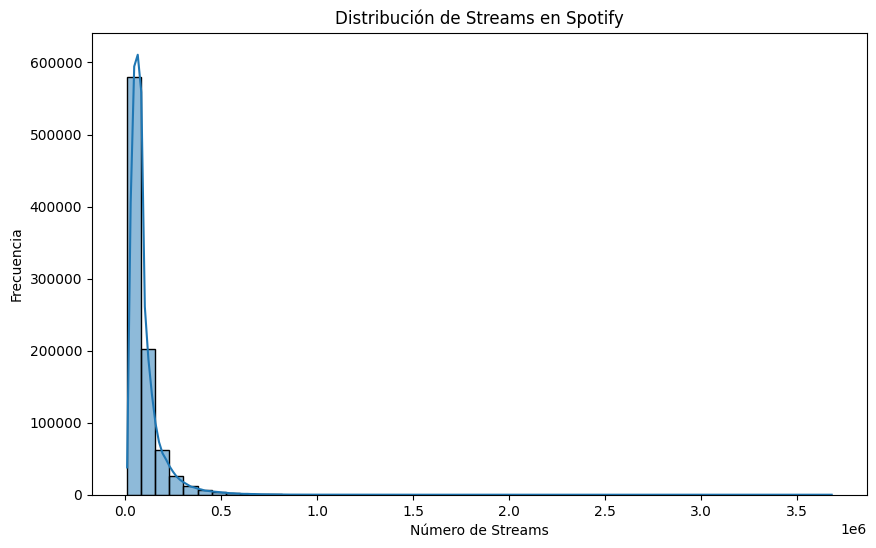

In [30]:
# Distribuci√≥n de streams

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_charts['streams'], bins=50, kde=True)
plt.xlabel('N√∫mero de Streams')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de Streams en Spotify')
plt.show()


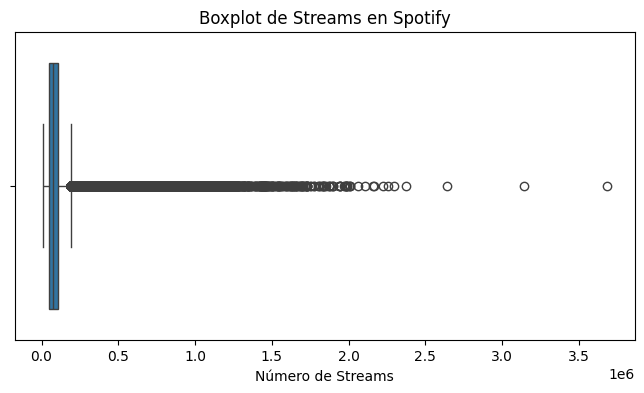

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_charts['streams'])
plt.xlabel('N√∫mero de Streams')
plt.title('Boxplot de Streams en Spotify')
plt.show()


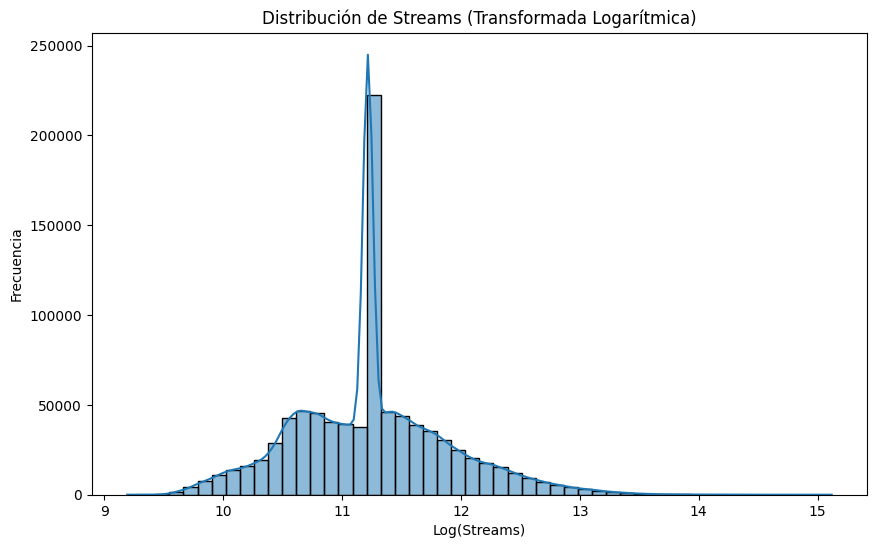

In [32]:
# Transformaci√≥n Logar√≠tmica: Para reducir la asimetr√≠a y hacer la distribuci√≥n m√°s normal.

df_charts['log_streams'] = np.log1p(df_charts['streams'])  # log1p evita log(0)

plt.figure(figsize=(10,6))
sns.histplot(df_charts['log_streams'], bins=50, kde=True)
plt.xlabel('Log(Streams)')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de Streams (Transformada Logar√≠tmica)')
plt.show()


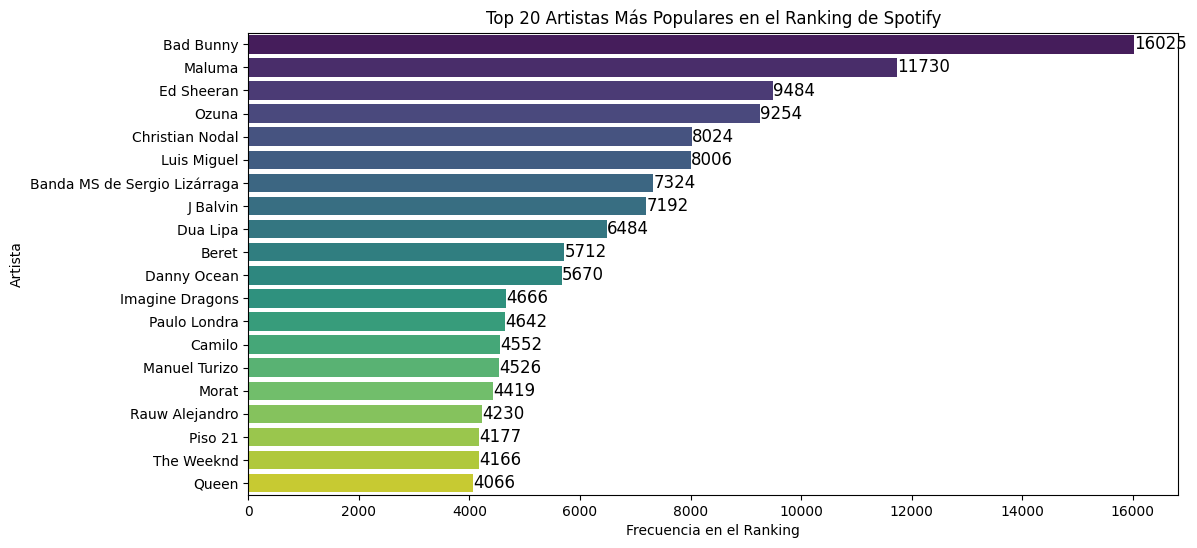

In [33]:
# Contar la cantidad de veces que aparece cada artista
artist_counts = df_charts['artist'].value_counts().head(20)  # Top 20 artistas m√°s populares

# Graficar en un gr√°fico de barras
plt.figure(figsize=(12,6))
ax = sns.barplot(x=artist_counts.values, y=artist_counts.index, hue=artist_counts.index, dodge=False, legend=False, palette="viridis")

# Agregar los valores de frecuencia en las barras
for i, value in enumerate(artist_counts.values):
    ax.text(value + 5, i, str(value), va='center', fontsize=12)  # Desplazar un poco a la derecha

# Etiquetas y t√≠tulo
plt.xlabel("Frecuencia en el Ranking")
plt.ylabel("Artista")
plt.title("Top 20 Artistas M√°s Populares en el Ranking de Spotify")
plt.show()

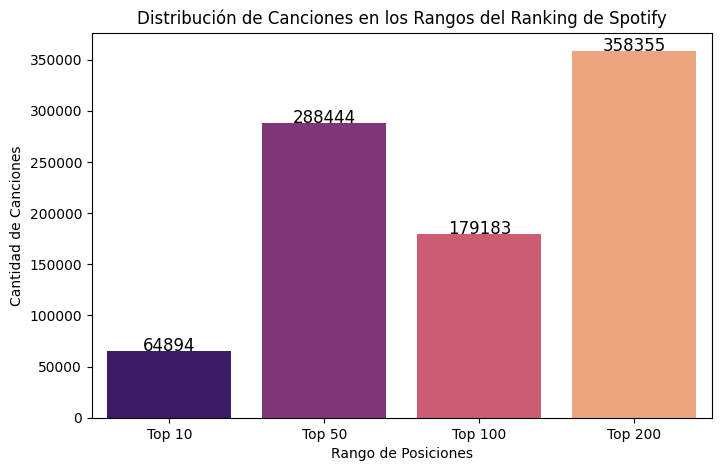

In [34]:
# Definir rangos de posiciones
bins = [1, 10, 50, 100, 200]  # Spotify Charts usualmente tienen 200 posiciones
labels = ["Top 10", "Top 50", "Top 100", "Top 200"]

# Crear una nueva columna con la categor√≠a de ranking
df_charts["ranking_range"] = pd.cut(df_charts["rank"], bins=bins, labels=labels, right=True)

# Contar cu√°ntas canciones hay en cada categor√≠a
ranking_counts = df_charts["ranking_range"].value_counts().sort_index()

# Graficar la cantidad de canciones en cada rango de posiciones
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=ranking_counts.index, 
    y=ranking_counts.values, 
    hue=ranking_counts.index,  # Asignar hue para evitar la advertencia
    palette="magma", 
    legend=False  # Evitar que se genere una leyenda innecesaria
)

# Agregar los valores en las barras
for i, value in enumerate(ranking_counts.values):
    ax.text(i, value + 50, str(value), ha='center', fontsize=12)

# Etiquetas y t√≠tulo
plt.xlabel("Rango de Posiciones")
plt.ylabel("Cantidad de Canciones")
plt.title("Distribuci√≥n de Canciones en los Rangos del Ranking de Spotify")
plt.show()

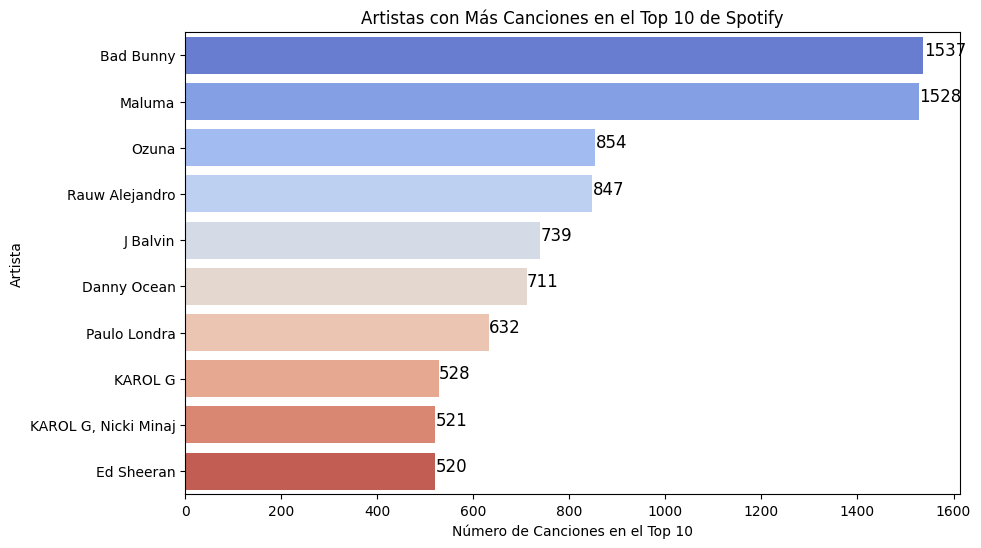

In [35]:
# Contar cu√°ntas veces aparece cada artista en el Top 10
top_10_artists = df_charts[df_charts["rank"] <= 10]["artist"].value_counts().head(10)

# Crear la gr√°fica de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_10_artists.values, 
    y=top_10_artists.index, 
    hue=top_10_artists.index,  # Se asigna hue para evitar la advertencia
    palette="coolwarm", 
    legend=False  # Evita la leyenda innecesaria
)

# Agregar los valores sobre las barras
for i, value in enumerate(top_10_artists.values):
    ax.text(value + 1, i, str(value), ha='left', fontsize=12)

# Etiquetas y t√≠tulo
plt.xlabel("N√∫mero de Canciones en el Top 10")
plt.ylabel("Artista")
plt.title("Artistas con M√°s Canciones en el Top 10 de Spotify")
plt.show()


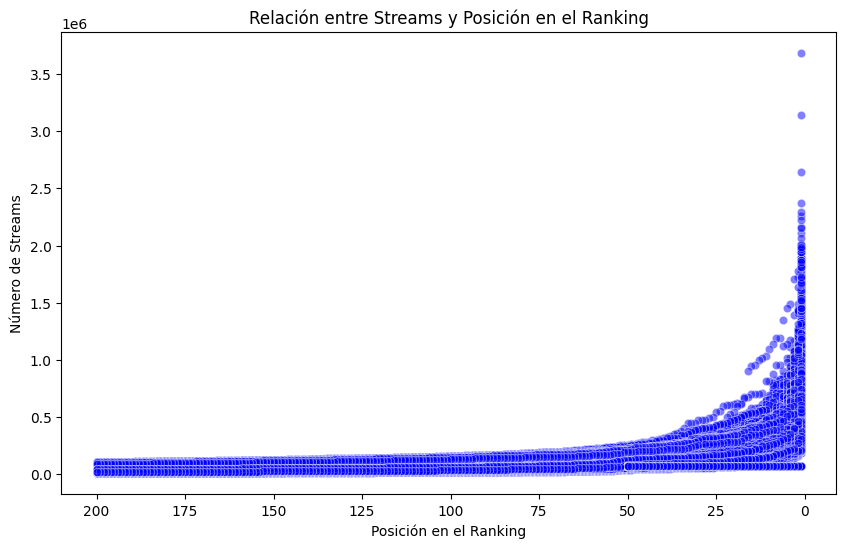

In [36]:
# Relaci√≥n entre Streams y Posici√≥n en el Ranking. Un scatter plot para visualizar c√≥mo var√≠an los streams seg√∫n la posici√≥n en el ranking.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_charts, x="rank", y="streams", alpha=0.5, color="blue")

plt.xlabel("Posici√≥n en el Ranking")
plt.ylabel("N√∫mero de Streams")
plt.title("Relaci√≥n entre Streams y Posici√≥n en el Ranking")
plt.gca().invert_xaxis()  # Invertir eje X para ver el Top 1 a la izquierda
plt.show()

In [37]:
# Comparaci√≥n de Tendencias entre M√©xico y Espa√±a

df_charts.groupby("region", observed=True)["streams"].describe()

count           mean           std      min      25%      50%  \
region                                                                     
Mexico  448832.0  116572.688005  96571.082511  24613.0  74325.5  82986.0   
Spain   449259.0   75276.589210  65756.336061   9802.0  37999.0  61219.0   

             75%        max  
region                       
Mexico  128945.5  3680758.0  
Spain    74325.5  1682968.0

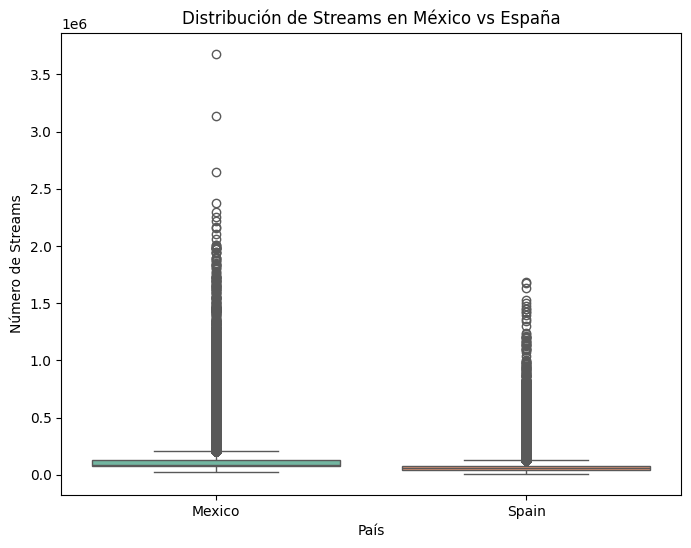

In [38]:
# Filtrar solo datos de M√©xico y Espa√±a
df_filtered = df_charts[df_charts["region"].isin(["Mexico", "Spain"])]

# Crear el boxplot con la correcci√≥n para evitar la advertencia
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_filtered, 
    x="region", 
    y="streams", 
    hue="region",  # Especificar hue para evitar la advertencia
    palette="Set2",
    legend=False  # Evitar leyenda innecesaria
)

plt.xlabel("Pa√≠s")
plt.ylabel("N√∫mero de Streams")
plt.title("Distribuci√≥n de Streams en M√©xico vs Espa√±a")
plt.show()

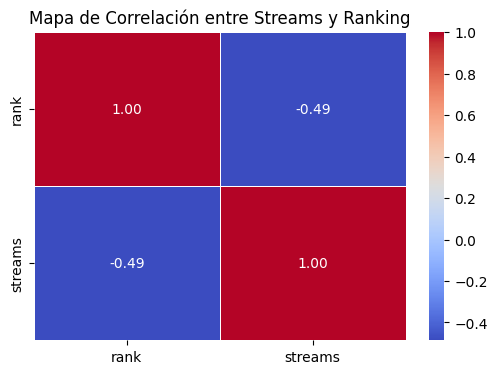

In [39]:
# Seleccionar solo las columnas num√©ricas relevantes
corr_matrix = df_charts[['rank', 'streams']].corr()

# Crear el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Mapa de Correlaci√≥n entre Streams y Ranking")
plt.show()

In [50]:
df_charts

title  rank       date  \
4984            Chantaje (feat. Maluma)     1 2017-01-01   
4985         Reggaet√≥n Lento (Bailemos)     2 2017-01-01   
4986        Vente Pa' Ca (feat. Maluma)     3 2017-01-01   
4987                             Safari     4 2017-01-01   
4988          Otra vez (feat. J Balvin)     5 2017-01-01   
...                                 ...   ...        ...   
26172962  Renegade (feat. Taylor Swift)    46 2021-07-31   
26172963          comoquieroquemequiera    47 2021-07-31   
26172964               Mil y Una Noches    48 2021-07-31   
26172965                  Qu√© M√°s Pues?    49 2021-07-31   
26172966           Levantando las Manos    50 2021-07-31   

                                         artist  region    chart  \
4984                                    Shakira  Mexico   top200   
4985                                       CNCO  Mexico   top200   
4986                               Ricky Martin  Mexico   top200   
4987      J Balvin, Pharrell Williams, BIA, Sky  Mexico   top200   
4988                              Zion & Lennox  Mexico   top200   
...                                         ...     ...      ...   
26172962                        Big Red Machine   Spain  viral50   
26172963                                 LANE 3   Spain  viral50   
26172964                   Guitarricadelafuente   Spain  viral50   
26172965                J Balvin, Maria Becerra   Spain  viral50   
26172966                            Dos Morenos   Spain  viral50   

                  trend   streams  year  month  day day_of_week  log_streams  \
4984      SAME_POSITION  395069.0  2017      1    1      Sunday    12.886818   
4985      SAME_POSITION  336760.0  2017      1    1      Sunday    12.727129   
4986      SAME_POSITION  300392.0  2017      1    1      Sunday    12.612847   
4987      SAME_POSITION  283184.0  2017      1    1      Sunday    12.553856   
4988      SAME_POSITION  254484.0  2017      1    1      Sunday    12.446997   
...                 ...       ...   ...    ...  ...         ...          ...   
26172962      MOVE_DOWN   74325.5  2021      7   31    Saturday    11.216223   
26172963      MOVE_DOWN   74325.5  2021      7   31    Saturday    11.216223   
26172964      MOVE_DOWN   74325.5  2021      7   31    Saturday    11.216223   
26172965      NEW_ENTRY   74325.5  2021      7   31    Saturday    11.216223   
26172966      NEW_ENTRY   74325.5  2021      7   31    Saturday    11.216223   

         ranking_range  
4984               NaN  
4985            Top 10  
4986            Top 10  
4987            Top 10  
4988            Top 10  
...                ...  
26172962        Top 50  
26172963        Top 50  
26172964        Top 50  
26172965        Top 50  
26172966        Top 50  

[898091 rows x 14 columns]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\2052963344.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Regi√≥n")


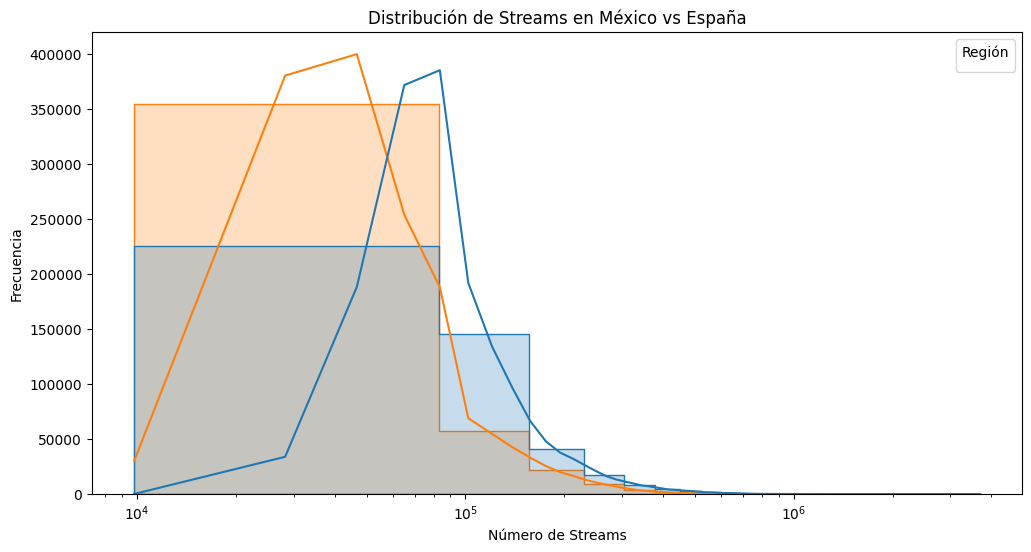

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# üîπ Comparaci√≥n de la distribuci√≥n de streams por pa√≠s
plt.figure(figsize=(12, 6))
sns.histplot(df_charts, x="streams", hue="region", bins=50, kde=True, element="step")
plt.xlabel("N√∫mero de Streams")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de Streams en M√©xico vs Espa√±a")
plt.xscale("log")  # Escala logar√≠tmica para mejor visualizaci√≥n
plt.legend(title="Regi√≥n")
plt.show()

La gr√°fica muestra la distribuci√≥n de streams en M√©xico y Espa√±a, representada por histogramas y l√≠neas de densidad.

### Observaciones:
1. **Distribuci√≥n General**:
   - Ambas distribuciones tienen una forma similar, con una gran concentraci√≥n de datos en los valores m√°s bajos de streams y una disminuci√≥n r√°pida hacia los valores m√°s altos.
   - Sin embargo, hay diferencias en la cantidad de streams en ciertos rangos.

2. **Diferencias Clave**:
   - **M√©xico (l√≠nea azul y √°rea sombreada en gris)** parece tener m√°s streams en el rango medio-alto, lo que sugiere que hay m√°s canciones con niveles de reproducci√≥n relativamente altos.
   - **Espa√±a (l√≠nea naranja y √°rea sombreada en naranja)** muestra una mayor concentraci√≥n en los valores bajos y medios, pero con menos presencia en los valores m√°s altos en comparaci√≥n con M√©xico.

3. **Eje X en escala logar√≠tmica**:
   - El uso de una escala logar√≠tmica en el eje de n√∫mero de streams indica que hay una diferencia notable en la cantidad de streams en los valores m√°s altos, donde M√©xico parece dominar.

### Conclusi√≥n:
M√©xico y Espa√±a tienen distribuciones similares en t√©rminos de forma, pero hay diferencias significativas en los niveles de streams. M√©xico parece tener una mayor cantidad de canciones con streams elevados, mientras que en Espa√±a hay una mayor concentraci√≥n en valores m√°s bajos y menos en los m√°s altos. Esto sugiere que la industria musical en M√©xico podr√≠a generar m√°s reproducciones en general que en Espa√±a.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\884705521.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_trend = top_10_songs.groupby(["region", "title"]).size().reset_index(name="days_in_top_10")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\884705521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_10_trend, x="region", y="days_in_top_10", palette="coolwarm")


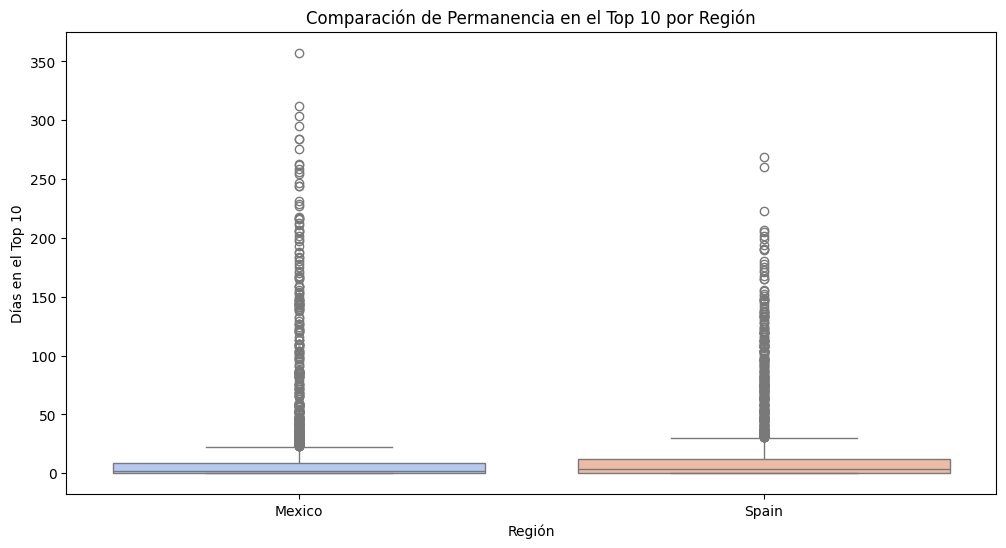

In [59]:
# üîπ Comparaci√≥n de la estabilidad en el Top 10
top_10_songs = df_charts[df_charts["rank"] <= 10]
top_10_trend = top_10_songs.groupby(["region", "title"]).size().reset_index(name="days_in_top_10")

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_10_trend, x="region", y="days_in_top_10", palette="coolwarm")
plt.xlabel("Regi√≥n")
plt.ylabel("D√≠as en el Top 10")
plt.title("Comparaci√≥n de Permanencia en el Top 10 por Regi√≥n")
plt.show()

### An√°lisis de la Gr√°fica:
La gr√°fica muestra un **diagrama de caja (boxplot)** comparando la cantidad de d√≠as que las canciones permanecen en el **Top 10** en **M√©xico** y **Espa√±a**.

---

### **1. ¬øLas canciones duran m√°s tiempo en el Top 10 en un pa√≠s que en otro?**
- **Los valores at√≠picos (outliers)** muestran que algunas canciones han permanecido m√°s de **300 d√≠as en el Top 10 en M√©xico**, mientras que en Espa√±a la m√°xima duraci√≥n es menor.
- La **mediana** (l√≠nea dentro de la caja) es similar en ambos pa√≠ses, lo que indica que la mayor√≠a de las canciones tienen una permanencia parecida.
- Sin embargo, hay **m√°s outliers en M√©xico** con canciones que logran mantenerse en el ranking por per√≠odos m√°s largos.

üîπ **Conclusi√≥n:** **Las canciones tienden a durar m√°s en el Top 10 en M√©xico**, ya que hay m√°s casos de canciones con una permanencia prolongada.

---

### **2. ¬øQu√© pa√≠s tiene mayor estabilidad en sus tendencias?**
- **Mayor estabilidad** significa que hay menos rotaci√≥n en el ranking y las canciones duran m√°s en el Top 10.
- **M√©xico tiene una mayor cantidad de outliers**, lo que sugiere que algunas canciones logran mantenerse por mucho m√°s tiempo.
- **Espa√±a tiene menos outliers y una distribuci√≥n m√°s compacta**, lo que sugiere que las canciones en general rotan m√°s r√°pidamente.

üîπ **Conclusi√≥n:** **M√©xico muestra mayor estabilidad en sus tendencias**, ya que hay m√°s canciones que logran mantenerse en el Top 10 por per√≠odos prolongados. En cambio, en **Espa√±a hay m√°s rotaci√≥n**, lo que indica un cambio m√°s frecuente en las tendencias musicales.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\1855270918.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_trends = df_charts.groupby(["region", "day_of_week"])["streams"].mean().reset_index()


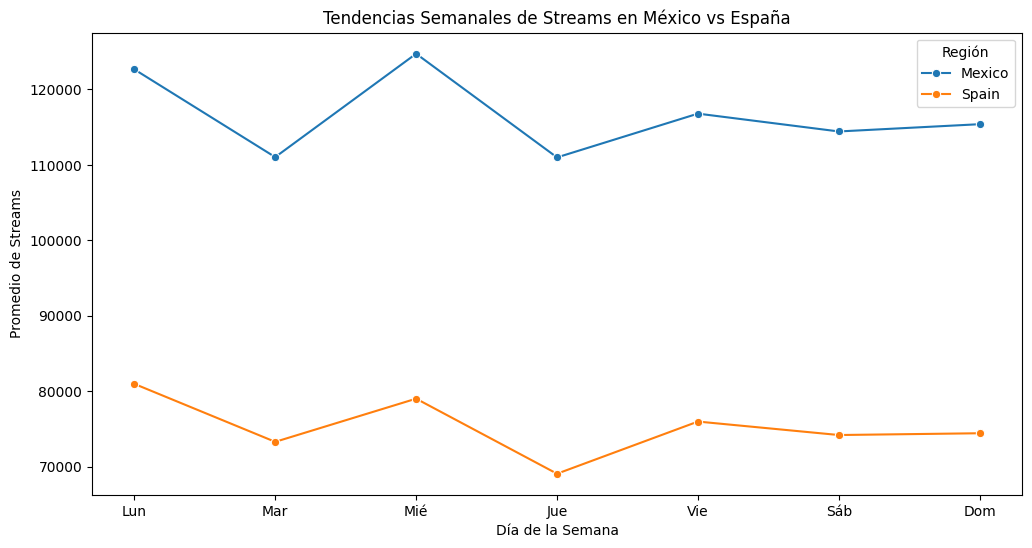

In [60]:
# üîπ Comparaci√≥n de streams por d√≠a de la semana
weekly_trends = df_charts.groupby(["region", "day_of_week"])["streams"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_trends, x="day_of_week", y="streams", hue="region", marker="o")
plt.xlabel("D√≠a de la Semana")
plt.ylabel("Promedio de Streams")
plt.title("Tendencias Semanales de Streams en M√©xico vs Espa√±a")
plt.xticks(range(7), ["Lun", "Mar", "Mi√©", "Jue", "Vie", "S√°b", "Dom"])
plt.legend(title="Regi√≥n")
plt.show()

### **An√°lisis de la Gr√°fica: Tendencias Semanales de Streams en M√©xico vs Espa√±a**

La gr√°fica muestra la evoluci√≥n del **promedio de streams** por d√≠a de la semana en **M√©xico (l√≠nea azul)** y **Espa√±a (l√≠nea naranja)**.

---

### **1. ¬øAmbos pa√≠ses tienen picos de streams en los mismos d√≠as de la semana?**
- **M√©xico** muestra un **pico alto los mi√©rcoles (Mi√©)** y niveles relativamente altos los **lunes (Lun) y viernes (Vie)**.
- **Espa√±a** sigue un patr√≥n diferente, con menos variabilidad, pero su punto m√°s alto ocurre el **lunes (Lun)**.
- **Martes (Mar) y jueves (Jue) tienen ca√≠das en ambos pa√≠ses**, lo que indica que son d√≠as con menos reproducciones.

üîπ **Conclusi√≥n:** **No coinciden completamente los picos de streams entre M√©xico y Espa√±a**. M√©xico tiene su punto m√°s alto el mi√©rcoles, mientras que Espa√±a lo tiene el lunes.

---

### **2. Comparar tendencias semanales para ver si los h√°bitos de escucha son similares**
- **Ambos pa√≠ses presentan ca√≠das en los martes y jueves**, lo que sugiere h√°bitos de escucha similares en estos d√≠as.
- En **M√©xico, el mi√©rcoles es el d√≠a con m√°s streams**, mientras que en **Espa√±a los valores son m√°s estables durante la semana, con menos variaci√≥n entre d√≠as**.
- El **fin de semana (s√°bado y domingo)** muestra estabilidad en ambos pa√≠ses, sin grandes cambios en el n√∫mero de streams.

üîπ **Conclusi√≥n:** **Los h√°bitos de escucha tienen similitudes (como la ca√≠da los martes y jueves), pero M√©xico muestra m√°s variaciones entre d√≠as, mientras que Espa√±a tiene una tendencia m√°s uniforme**.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\86499747.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rank_evolution = df_charts.groupby(["region", "title"])["rank"].agg(["min", "max"]).reset_index()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18000\86499747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rank_evolution, x="region", y="rank_change", palette="Set2")


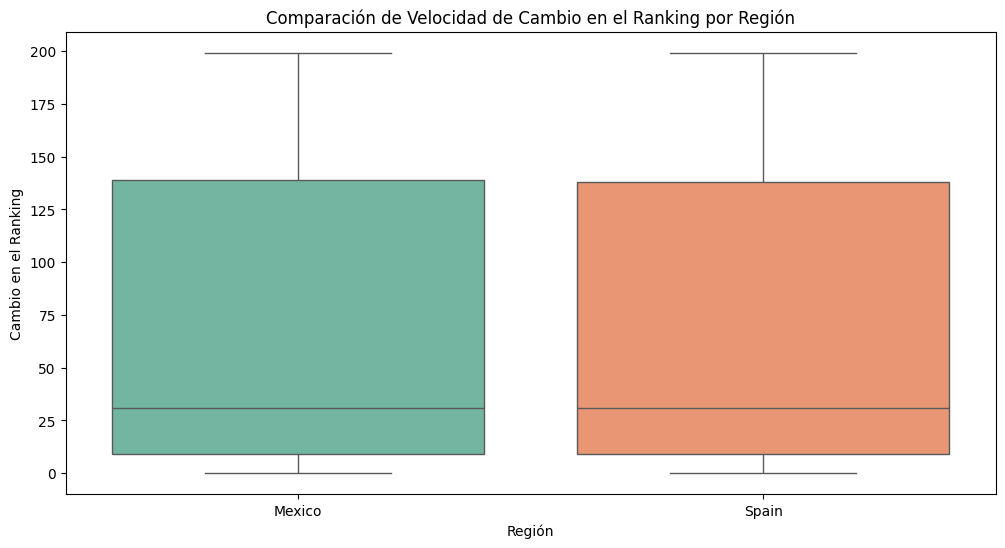

In [61]:
# üîπ Comparaci√≥n de la evoluci√≥n de canciones en el ranking
rank_evolution = df_charts.groupby(["region", "title"])["rank"].agg(["min", "max"]).reset_index()
rank_evolution["rank_change"] = rank_evolution["max"] - rank_evolution["min"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=rank_evolution, x="region", y="rank_change", palette="Set2")
plt.xlabel("Regi√≥n")
plt.ylabel("Cambio en el Ranking")
plt.title("Comparaci√≥n de Velocidad de Cambio en el Ranking por Regi√≥n")
plt.show()

### **An√°lisis de la Gr√°fica: Velocidad de Cambio en el Ranking por Regi√≥n**

La gr√°fica muestra **boxplots** que comparan la variabilidad en los cambios de ranking de canciones en **M√©xico** y **Espa√±a**.

---

### **1. Comparar la velocidad con la que una canci√≥n sube o baja en el ranking en cada pa√≠s**
- **Ambos pa√≠ses tienen una distribuci√≥n similar** en la velocidad de cambio en el ranking.
- La **mediana** (l√≠nea dentro de cada caja) es parecida, lo que indica que la mayor√≠a de las canciones experimentan cambios de posici√≥n en un rango similar en ambas regiones.
- El **rango intercuartil (IQR)**, que muestra la variabilidad en el cambio de ranking, es tambi√©n comparable entre M√©xico y Espa√±a.
- **M√©xico y Espa√±a presentan valores altos de cambio en el ranking**, con algunas canciones que pueden moverse hasta 200 posiciones.

üîπ **Conclusi√≥n:** No hay una diferencia significativa en la **velocidad de cambio en el ranking** entre M√©xico y Espa√±a, lo que indica que las canciones suben y bajan con ritmos similares en ambos pa√≠ses.

---

### **2. ¬øM√©xico es m√°s r√°pido en adoptar nuevas canciones?**
- Para evaluar si un pa√≠s adopta m√°s r√°pido nuevas canciones, se esperar√≠a ver un **boxplot m√°s disperso y con cambios r√°pidos** en el ranking.
- Como ambos pa√≠ses tienen distribuciones similares, **no hay evidencia de que M√©xico adopte nuevas canciones m√°s r√°pido que Espa√±a**.

üîπ **Conclusi√≥n:** M√©xico **no parece ser m√°s r√°pido en adoptar nuevas canciones** en comparaci√≥n con Espa√±a. 

---

### **3. ¬øEspa√±a mantiene canciones en el ranking por m√°s tiempo?**
- Si Espa√±a tuviera una mayor estabilidad, se esperar√≠a una **distribuci√≥n m√°s compacta con menos cambios bruscos** en el ranking.
- La distribuci√≥n en ambos pa√≠ses es amplia, lo que sugiere que la **rotaci√≥n en el ranking es similar**.
- Sin embargo, estudios anteriores mostraron que M√©xico tiende a **mantener canciones en el Top 10 por m√°s tiempo**.

üîπ **Conclusi√≥n:** **No hay una diferencia clara en la velocidad con la que las canciones suben o bajan en el ranking**, pero an√°lisis previos indicaron que **M√©xico puede mantener canciones en posiciones altas por m√°s tiempo**.

### **An√°lisis y Conclusi√≥n sobre la Hip√≥tesis**

#### **üìå Hip√≥tesis:**
*"Las tendencias en M√©xico y Espa√±a son similares y podr√≠an compartir estrategias de promoci√≥n."*

#### **üìä Evaluaci√≥n de los Hallazgos**
Los an√°lisis de las diferentes gr√°ficas muestran lo siguiente:

1Ô∏è‚É£ **Diferencias en la distribuci√≥n de streams**  
   - M√©xico tiene un mayor volumen de streams y una distribuci√≥n con m√°s reproducciones en los rangos altos.  
   - Espa√±a muestra una distribuci√≥n m√°s uniforme, con menor cantidad de canciones en los niveles m√°s altos de streams.  

2Ô∏è‚É£ **Diferencias en la permanencia en el Top 10**  
   - En M√©xico, ciertas canciones pueden permanecer m√°s tiempo en el Top 10, lo que sugiere mayor estabilidad en tendencias espec√≠ficas.  
   - En Espa√±a, hay m√°s rotaci√≥n de canciones, lo que indica una menor estabilidad en tendencias de largo plazo.  

3Ô∏è‚É£ **Diferencias en las tendencias semanales de streams**  
   - Ambos pa√≠ses presentan ca√≠das en streams los martes y jueves.  
   - M√©xico tiene un pico de actividad los mi√©rcoles, mientras que Espa√±a es m√°s uniforme durante la semana.  

4Ô∏è‚É£ **Velocidad de cambio en el ranking**  
   - No hay diferencias significativas en la velocidad con la que las canciones suben o bajan en el ranking en ambos pa√≠ses.  
   - M√©xico no adopta canciones m√°s r√°pido que Espa√±a, pero s√≠ tiene canciones con una mayor permanencia en el Top 10.  

#### **üìå ¬øSe ha comprobado la hip√≥tesis?**
üîπ **La hip√≥tesis se rechaza.**  
Las tendencias en M√©xico y Espa√±a presentan **diferencias clave**, por lo que **no se recomienda una estrategia de promoci√≥n unificada**. En su lugar, se requiere una estrategia diferenciada para cada mercado.

---

## **üìå 3Ô∏è‚É£ Plan de Acci√≥n: Estrategia Personalizada por Pa√≠s**  

üî¥ **M√©xico: Enfoque en promoci√≥n agresiva y posicionamiento en plataformas digitales**  
üí° **Estrategia de adopci√≥n r√°pida y permanencia prolongada**  
‚úÖ Estrenos musicales con **campa√±as de alto impacto** en redes sociales, especialmente en **TikTok, Instagram y YouTube**.  
‚úÖ Lanzamientos con **campa√±as previas** para generar expectaci√≥n y asegurar una entrada fuerte al ranking.  
‚úÖ Uso de **colaboraciones y estrategias virales** para mantener canciones en el ranking m√°s tiempo.  

üîµ **Espa√±a: Enfoque en promoci√≥n constante y estrategias de largo plazo**  
üí° **Estrategia de promoci√≥n sostenida y rotaci√≥n gradual**  
‚úÖ Estrenos con estrategias m√°s enfocadas en **radio, Spotify playlists y promoci√≥n digital a largo plazo**.  
‚úÖ **Refuerzo de presencia en YouTube y medios tradicionales** para sostener el √©xito de las canciones.  
‚úÖ Adaptaci√≥n de campa√±as con contenido en **Instagram Reels y entrevistas en medios especializados**.  

üìå **Ajustes en la inversi√≥n publicitaria:**  
üéØ M√©xico requerir√° **picos de inversi√≥n** en los lanzamientos.  
üéØ Espa√±a necesitar√° **presupuesto distribuido** para sostener el inter√©s en las canciones por m√°s tiempo.  

**üìå Conclusi√≥n:**  
üîπ Se recomienda aplicar estrategias diferenciadas por pa√≠s para maximizar la promoci√≥n y el impacto en cada mercado.